# Temperature_Brazil_Central_West_Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Loading & Initial Overview

## 1.1 Data Loading

In [2]:
line_start = '\033[4m'
bold_start = '\033[1m'
style_end   = '\033[0m'
bullet_start = '\u2022 '
trait_start = '- '

In [3]:
%run '/content/drive/My Drive/Colab Notebooks/data_utils.ipynb'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
sns.set(style="whitegrid")

## 1.2 Initial EDA

In [ ]:
temp_braz = load_data('/content/drive/My Drive/Colab Notebooks/central_west.csv',700000,'ISO-8859-1',None)
check(temp_braz, 10)

In this data set we have two columns (date and hourly) which will make our data exploration analysis a bit complex thus we will start by combining those two columns into one since now.

In [ ]:
temp_braz['datetime'] = pd.to_datetime(temp_braz['Data'] + ' ' + temp_braz['Hora'].astype(str) + ':00', errors='coerce')
columns_to_drop = ['Data','Hora']
drop_columns(temp_braz, columns_to_drop)
check(temp_braz, 10)

Dropped columns: ['Data', 'Hora']


,index,"PRECIPITAÃÃO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),TEMPERATURA MÃXIMA NA HORA ANT. (AUT) (Â°C),TEMPERATURA MÃNIMA NA HORA ANT. (AUT) (Â°C),...,"VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height,datetime
0,138998,0.0,899.6,900.0,899.6,3391,26.5,17.7,26.5,24.4,...,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 14:00:00
1,138999,0.0,899.2,899.6,899.2,3306,26.6,16.7,26.7,25.4,...,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 15:00:00
2,139000,0.0,898.6,899.2,898.6,3167,27.3,15.8,27.6,25.9,...,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 16:00:00
3,139001,0.0,897.7,898.6,897.7,3279,27.5,12.9,28.5,26.6,...,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 17:00:00
4,139002,0.0,897.0,897.7,897.0,2753,27.5,13.7,28.9,27.4,...,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 18:00:00
5,139003,0.0,896.3,897.0,896.3,2140,28.4,13.5,28.6,27.4,...,6.4,2.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 19:00:00
6,139004,0.0,895.8,896.3,895.8,1545,27.7,13.8,28.4,27.5,...,5.8,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 20:00:00
7,139005,0.0,896.1,896.1,895.7,692,26.2,12.4,27.7,26.1,...,5.6,2.3,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 21:00:00
8,139006,0.0,896.6,896.6,896.0,46,21.8,16.0,26.3,21.7,...,4.1,1.0,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 22:00:00
9,139007,0.0,897.1,897.2,896.6,-9999,22.4,16.0,22.9,21.5,...,2.9,1.0,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0,2017-12-20 23:00:00


#### Quick Column Name Formatting

In [ ]:
#Quick Translation
column_translations = {
    'PRECIPITAÃÃO TOTAL, HORÃRIO (mm)': 'total_precipitation_hourly_mm',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'station_pressure_hourly_mB',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'station_pressure_max_previous_hour_mB',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'station_pressure_min_previous_hour_mB',
    'RADIACAO GLOBAL (Kj/mÂ²)': 'global_radiation_kj_m2',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)': 'dry_bulb_air_temperature_hourly_c',
    'TEMPERATURA DO PONTO DE ORVALHO (Â°C)': 'dew_point_temperature_c',
    'TEMPERATURA MÃXIMA NA HORA ANT. (AUT) (Â°C)': 'max_temperature_previous_hour_c',
    'TEMPERATURA MÃNIMA NA HORA ANT. (AUT) (Â°C)': 'min_temperature_previous_hour_c',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Â°C)': 'max_dew_point_previous_hour_c',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Â°C)': 'min_dew_point_previous_hour_c',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'max_relative_humidity_previous_hour',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'min_relative_humidity_previous_hour',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'relative_humidity_hourly',
    'VENTO, DIREÃÃO HORARIA (gr) (Â° (gr))': 'wind_direction_hourly_deg',
    'VENTO, RAJADA MAXIMA (m/s)': 'wind_gust_max_m_s',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'wind_speed_hourly_m_s',
}

# Rename columns in DataFrame
temp_braz.rename(columns=column_translations, inplace=True)

# Display the updated column names to confirm the changes
print("Updated column names:", temp_braz.columns)

Updated column names: Index(['index', 'total_precipitation_hourly_mm', 'station_pressure_hourly_mB',
       'station_pressure_max_previous_hour_mB',
       'station_pressure_min_previous_hour_mB', 'global_radiation_kj_m2',
       'dry_bulb_air_temperature_hourly_c', 'dew_point_temperature_c',
       'max_temperature_previous_hour_c', 'min_temperature_previous_hour_c',
       'max_dew_point_previous_hour_c', 'min_dew_point_previous_hour_c',
       'max_relative_humidity_previous_hour',
       'min_relative_humidity_previous_hour', 'relative_humidity_hourly',
       'wind_direction_hourly_deg', 'wind_gust_max_m_s',
       'wind_speed_hourly_m_s', 'region', 'state', 'station', 'station_code',
       'latitude', 'longitude', 'height', 'datetime'],
      dtype='object')


In [ ]:
initial_eda(temp_braz, datetime_column='datetime')

----- Data Overview -----
Dataset Shape: (700000, 26)
Column Names: ['index', 'total_precipitation_hourly_mm', 'station_pressure_hourly_mB', 'station_pressure_max_previous_hour_mB', 'station_pressure_min_previous_hour_mB', 'global_radiation_kj_m2', 'dry_bulb_air_temperature_hourly_c', 'dew_point_temperature_c', 'max_temperature_previous_hour_c', 'min_temperature_previous_hour_c', 'max_dew_point_previous_hour_c', 'min_dew_point_previous_hour_c', 'max_relative_humidity_previous_hour', 'min_relative_humidity_previous_hour', 'relative_humidity_hourly', 'wind_direction_hourly_deg', 'wind_gust_max_m_s', 'wind_speed_hourly_m_s', 'region', 'state', 'station', 'station_code', 'latitude', 'longitude', 'height', 'datetime']
Data Types:
 index                                             int64
total_precipitation_hourly_mm                   float64
station_pressure_hourly_mB                      float64
station_pressure_max_previous_hour_mB           float64
station_pressure_min_previous_hour_mB   

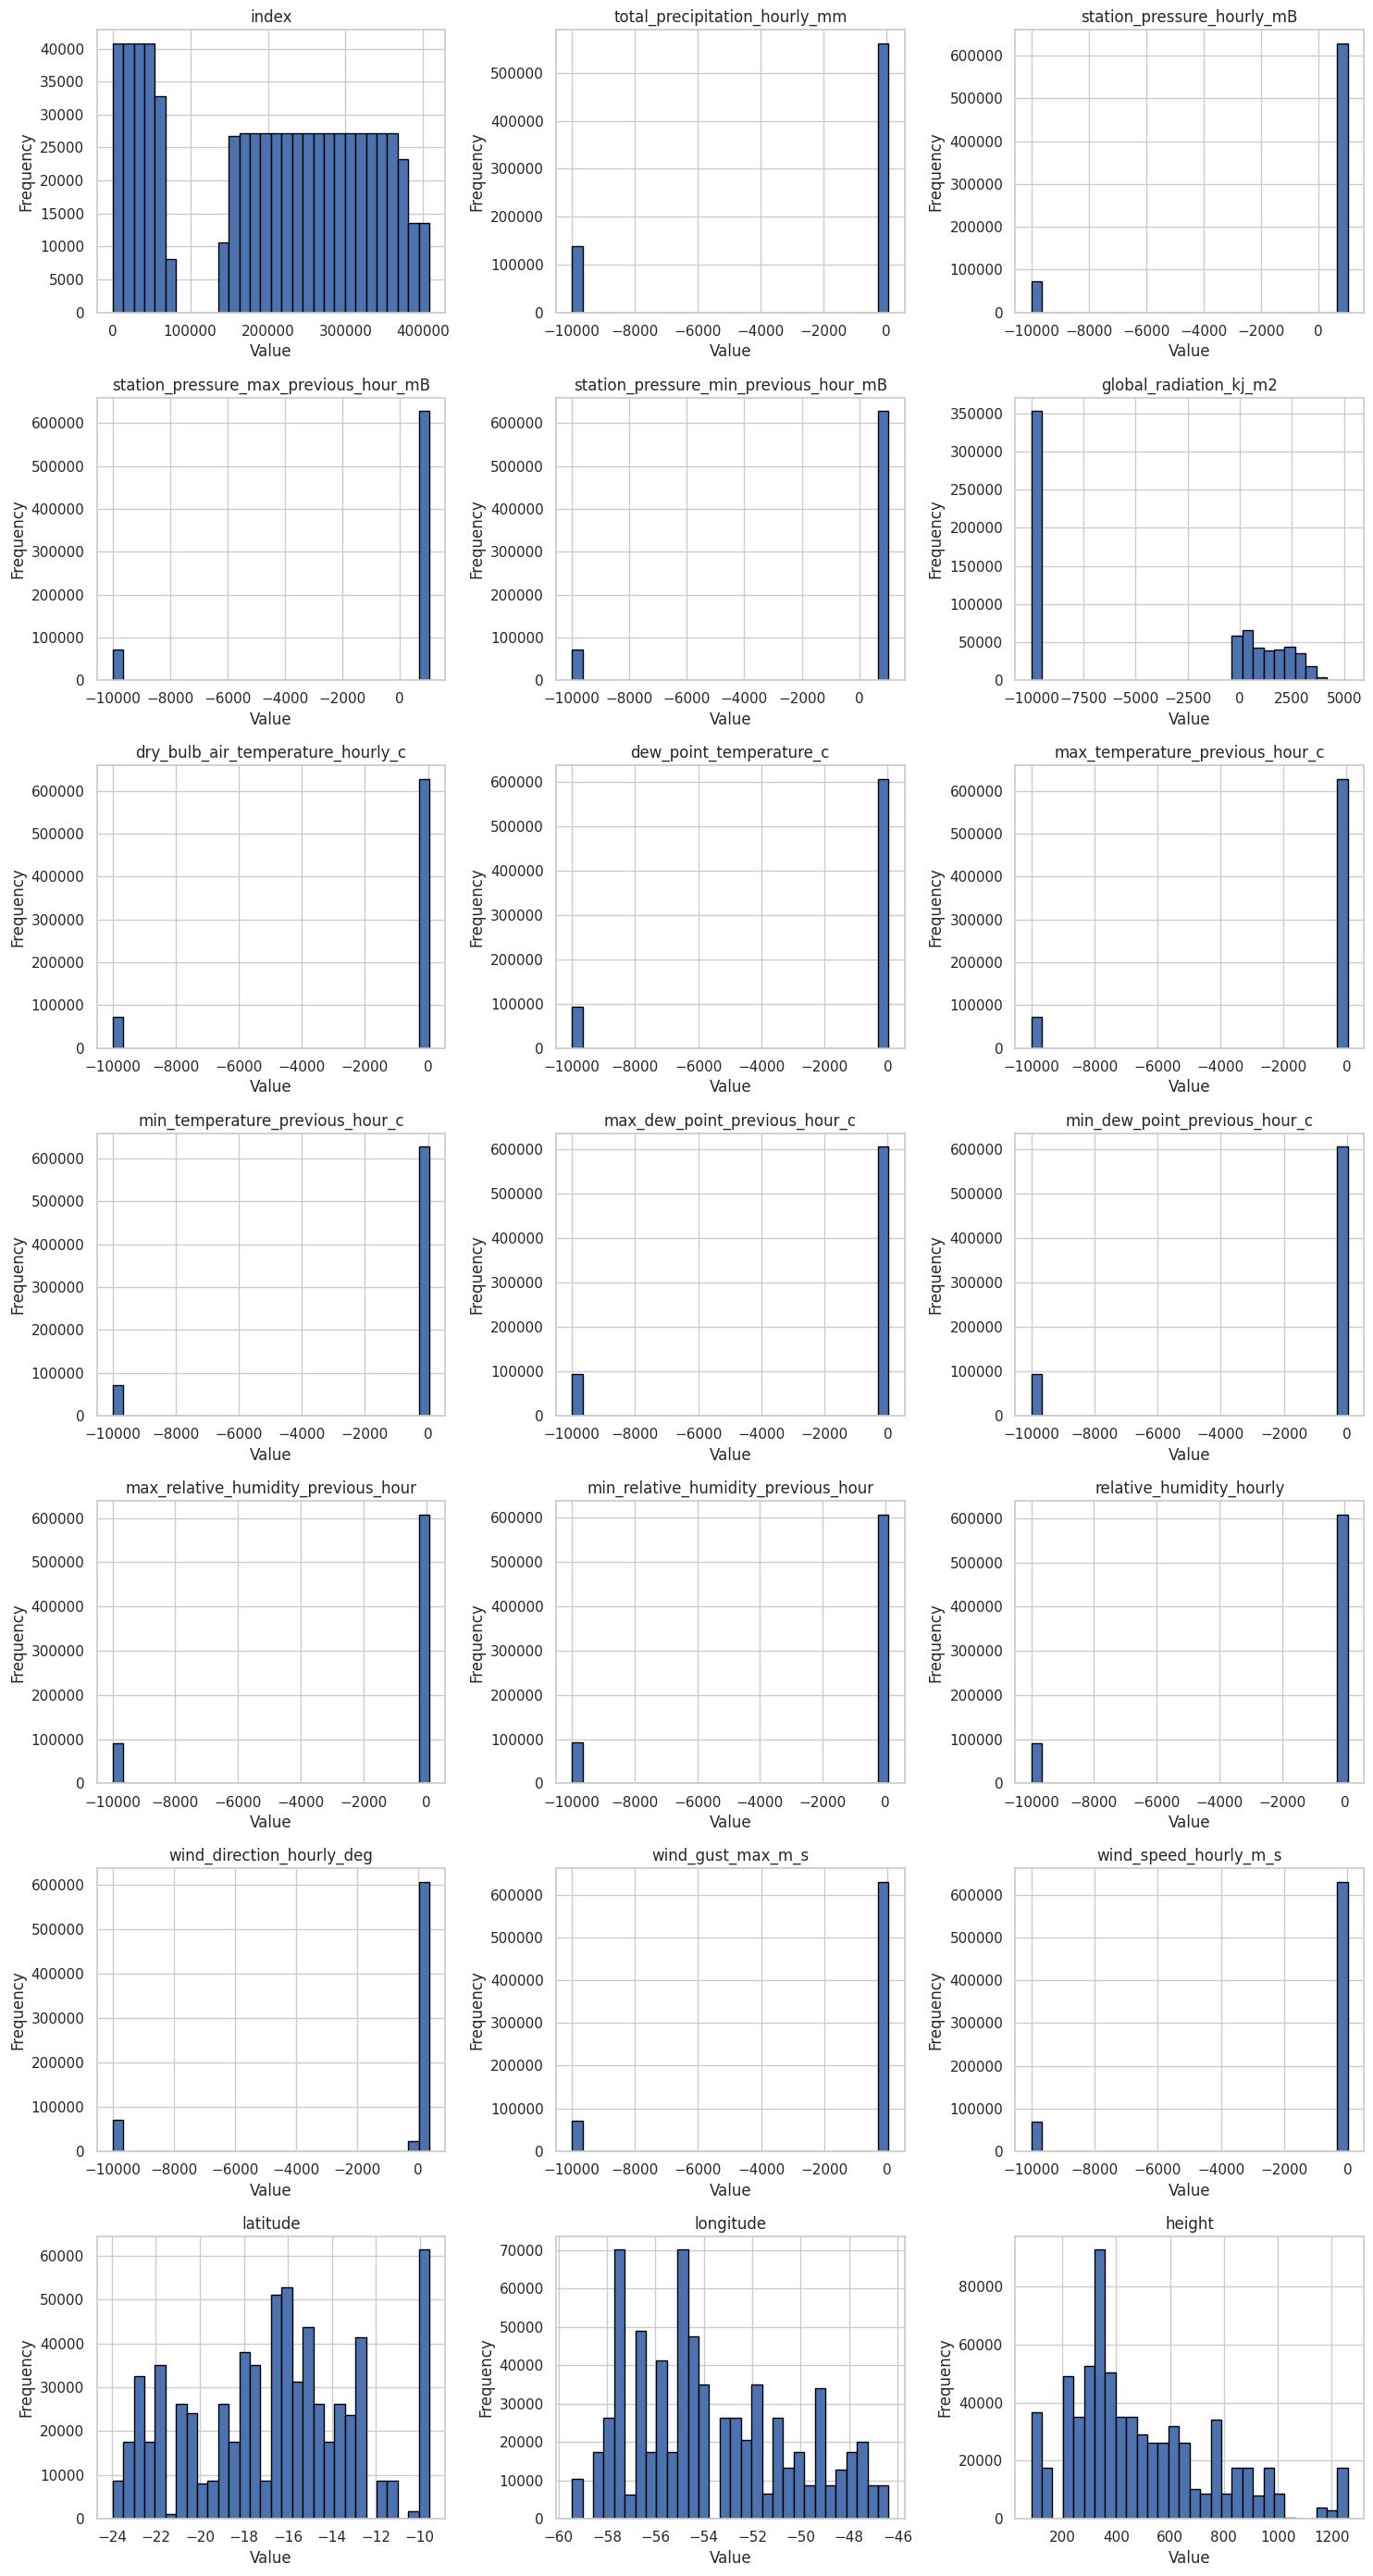

In [ ]:
plot_numeric_histograms(temp_braz)


<ipython-input-10-7b028a1d135c>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_entry_count = temp_braz.resample('M').size()


Monthly entry count:
datetime
2017-01-31    40920
2017-02-28    37484
2017-03-31    41664
2017-04-30    40315
2017-05-31    40920
2017-06-30    39648
2017-07-31    41976
2017-08-31    42408
2017-09-30    41040
2017-10-31    42840
2017-11-30    42480
2017-12-31    44170
2018-01-31    15120
2018-02-28    14784
2018-03-31    16071
2018-04-30    17138
2018-05-31    18459
2018-06-30    17280
2018-07-31    17856
2018-08-31    17293
2018-09-30    17142
2018-10-31    17856
2018-11-30    17280
2018-12-31    17856
Freq: ME, dtype: int64


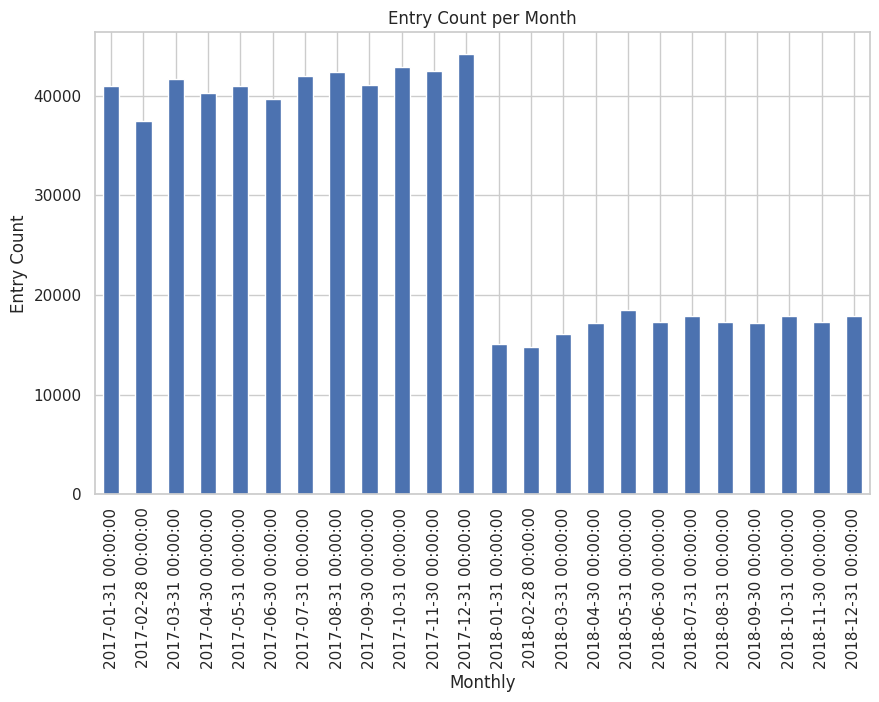

In [ ]:
# Ensures 'datetime' is set as the index if it's not already
if 'datetime' in temp_braz.columns and temp_braz.index.name != 'datetime':
    temp_braz.set_index('datetime', inplace=True)

# Resamples the data by Day and count the entries per Day
monthly_entry_count = temp_braz.resample('M').size()

# Display the counts for each month
print("Monthly entry count:")
print(monthly_entry_count)

# Plotting the monthly entry count to visualize uniformity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_entry_count.plot(kind='bar')
plt.title('Entry Count per Month')
plt.xlabel('Monthly')
plt.ylabel('Entry Count')
plt.show()

Based on the histograms, most features (except latitude, longitude, and height) contain placeholder values (-9999) that need to be handled. We'll replace these values as part of our cleaning process. The index column will be dropped, and datetime will be set as the index for time-series analysis.

Based on the data exploration stage we have been able to spot the following key observations:

### Key Observations
- **Shape and Size:**
The dataset contains 700,000 rows and 26 columns, which is large enough for robust analysis.

- **Column Names:**
Column names contain encoding issues or are formatted in Portuguese, which might hinder understanding and accessibility.
We previously attempted renaming; however, it’s essential to ensure all names are correctly translated and properly formatted.

- **Data Types:**
Most columns are numeric, which is suitable for time series forecasting.
datetime is correctly identified as a datetime type, which will support time-based analysis.
Basic Statistics and Data Range:

- **Outliers:**
Columns show extreme minimum values of -9999, which indicate likely placeholder values for missing data.

- **Ranged Values:**
Columns like temperature and humidity percentages have unusual statistics (e.g., very negative means), likely due to these placeholder values.

- **Pressure and Radiation:**
Some columns also have extreme negative minimums (-9999), suggesting data cleaning is required for accurate analysis.

- **Date-Time Range:**
The dataset spans from January 2017 to December 2018. This time range covers two years, which is beneficial for observing seasonal patterns.

### Initial Column Drop Decisions

**Geographical Information (region, state, station, station_code)**
- Reason for Removal: Latitude and longitude provide precise geographical positioning as numerical values, which are preferable to categorical columns like region, state, station, and station_code. By retaining latitude and longitude, we avoid introducing categorical dummy variables, which would unnecessarily increase dimensionality without adding unique insights. Additionally, since geographical location isn’t a primary feature for our analysis, keeping latitude and longitude alone strikes a balance between information retention and model simplicity.

**Previous Hourly Extremes (min/max for temperature, humidity, and pressure)**
- Reason for Removal: The model's architecture will include time-series models (e.g., LSTM, Transformers), which are inherently capable of capturing temporal dependencies and patterns. Including columns for previous hourly extremes (e.g., max_temperature_previous_hour_c, min_temperature_previous_hour_c, etc.) would introduce redundancy, as these models can effectively learn past patterns without needing specific columns for prior values. Removing these columns preserves the integrity of the model's temporal capabilities, ensuring a fair comparison between models and avoiding over-reliance on manually added historical data.

**Columns with High Redundancy (e.g., min and max of the same hour)**
- Reason for Removal: Columns like station_pressure_min_previous_hour_mB and station_pressure_max_previous_hour_mB essentially represent boundaries of variation within the same hour and are redundant when the main metric (e.g., station_pressure_hourly_mB) is already present. By focusing on the primary metric, we reduce redundancy and prevent the model from being overwhelmed with correlated features, which could lead to instability and hinder interpretability.

**Summary**

This refined column selection aims to:
- Reduce dimensionality without losing valuable information.
- Maintain a streamlined feature set to enable effective model learning, especially with time-series - models, by leveraging only necessary historical values.
- Preserve latitude and longitude for geographical insights without categorical dummies.
- This approach aligns with best practices in feature selection and EDA, ensuring that only relevant and unique features are passed forward to the modeling stage.








# 2. Data PreProcessing

## 2.1. Handling Records' Uniformity

In time-series analysis, it is crucial to maintain consistent data intervals, especially for environmental or sensor data that exhibit seasonal or diurnal patterns. By retaining only those stations with complete hourly data, we ensure that no temporal gaps affect the analysis, reducing noise and avoiding potential biases from stations with intermittent data. This approach is especially important here as it preserves the temporal structure, which is essential for models that rely on sequential patterns and seasonal trends.

In [ ]:
print(temp_braz.columns)

Index(['index', 'total_precipitation_hourly_mm', 'station_pressure_hourly_mB',
       'station_pressure_max_previous_hour_mB',
       'station_pressure_min_previous_hour_mB', 'global_radiation_kj_m2',
       'dry_bulb_air_temperature_hourly_c', 'dew_point_temperature_c',
       'max_temperature_previous_hour_c', 'min_temperature_previous_hour_c',
       'max_dew_point_previous_hour_c', 'min_dew_point_previous_hour_c',
       'max_relative_humidity_previous_hour',
       'min_relative_humidity_previous_hour', 'relative_humidity_hourly',
       'wind_direction_hourly_deg', 'wind_gust_max_m_s',
       'wind_speed_hourly_m_s', 'region', 'state', 'station', 'station_code',
       'latitude', 'longitude', 'height'],
      dtype='object')


In [ ]:
# Step 1: Create a full range of hourly timestamps based on the index
full_time_range = pd.date_range(start=temp_braz.index.min(), end=temp_braz.index.max(), freq='H')

# Step 2: Group by 'station_code' and check if each station has entries for every timestamp in the full range
complete_stations = []
for station_code, group in temp_braz.groupby('station_code'):
    # Reindex the group to match the full time range, filling with NaN for missing entries
    reindexed_group = group.reindex(full_time_range)

    # Check if the station has data for all timestamps (i.e., no NaN values after reindexing)
    if reindexed_group.dropna().shape[0] == len(full_time_range):
        complete_stations.append(station_code)

# Step 3: Filter the main DataFrame to include only rows from stations with complete data
temp_braz = temp_braz[temp_braz['station_code'].isin(complete_stations)]

print("Stations with complete hourly data retained:", len(complete_stations))


<ipython-input-12-2991c7cf1d56>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=temp_braz.index.min(), end=temp_braz.index.max(), freq='H')


Stations with complete hourly data retained: 9


Monthly entry count:
datetime
2017-01-31    6696
2017-02-28    6048
2017-03-31    6696
2017-04-30    6480
2017-05-31    6696
2017-06-30    6480
2017-07-31    6696
2017-08-31    6696
2017-09-30    6480
2017-10-31    6696
2017-11-30    6480
2017-12-31    6696
2018-01-31    6696
2018-02-28    6048
2018-03-31    6696
2018-04-30    6480
2018-05-31    6696
2018-06-30    6480
2018-07-31    6696
2018-08-31    6696
2018-09-30    6480
2018-10-31    6696
2018-11-30    6480
2018-12-31    6696
Freq: ME, dtype: int64


<ipython-input-13-7b028a1d135c>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_entry_count = temp_braz.resample('M').size()


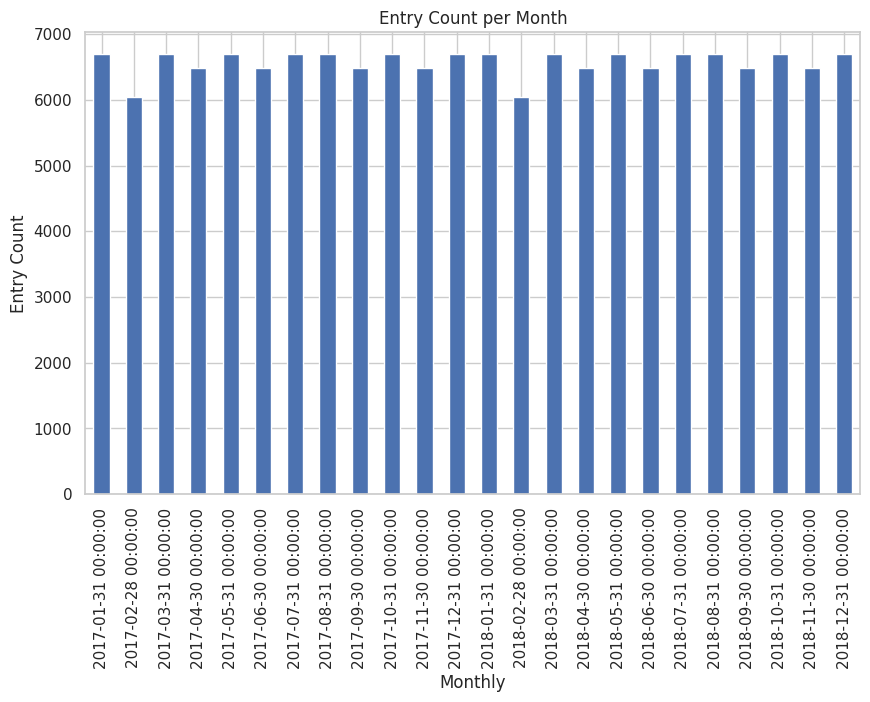

In [ ]:
# Ensures 'datetime' is set as the index if it's not already
if 'datetime' in temp_braz.columns and temp_braz.index.name != 'datetime':
    temp_braz.set_index('datetime', inplace=True)

# Resamples the data by Day and count the entries per Day
monthly_entry_count = temp_braz.resample('M').size()

# Display the counts for each month
print("Monthly entry count:")
print(monthly_entry_count)

# Plotting the monthly entry count to visualize uniformity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_entry_count.plot(kind='bar')
plt.title('Entry Count per Month')
plt.xlabel('Monthly')
plt.ylabel('Entry Count')
plt.show()


In [ ]:
unique_station_codes = temp_braz['station_code'].unique()
print(bold_start,bullet_start, "Unique station codes:", style_end, unique_station_codes)


 •  Unique station codes:  ['A754' 'A752' 'A910' 'A904' 'A902' 'A028' 'A941' 'A014' 'A924']


## 2.2 Intial Feature Selection

In [ ]:
columns_to_drop = ['region', 'state', 'station', 'min_relative_humidity_previous_hour','max_relative_humidity_previous_hour', 'min_dew_point_previous_hour_c', 'max_dew_point_previous_hour_c', 'min_temperature_previous_hour_c', 'max_temperature_previous_hour_c', 'station_pressure_min_previous_hour_mB', 'station_pressure_max_previous_hour_mB']

In [ ]:
drop_columns(temp_braz, columns_to_drop)

Dropped columns: ['region', 'state', 'station', 'min_relative_humidity_previous_hour', 'max_relative_humidity_previous_hour', 'min_dew_point_previous_hour_c', 'max_dew_point_previous_hour_c', 'min_temperature_previous_hour_c', 'max_temperature_previous_hour_c', 'station_pressure_min_previous_hour_mB', 'station_pressure_max_previous_hour_mB']


In [ ]:
check(temp_braz,5)

,index,total_precipitation_hourly_mm,station_pressure_hourly_mB,global_radiation_kj_m2,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,relative_humidity_hourly,wind_direction_hourly_deg,wind_gust_max_m_s,wind_speed_hourly_m_s,station_code,latitude,longitude,height
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,156792,0.0,958.0,-9999,21.6,20.6,94,329,4.7,1.2,A754,-20.981667,-54.971944,464.0
2017-01-01 01:00:00,156793,0.0,958.3,-9999,21.7,20.4,93,327,3.1,1.4,A754,-20.981667,-54.971944,464.0
2017-01-01 02:00:00,156794,0.0,958.8,-9999,21.5,20.1,92,336,2.7,0.5,A754,-20.981667,-54.971944,464.0
2017-01-01 03:00:00,156795,0.0,958.8,-9999,22.1,19.6,86,2,2.1,1.0,A754,-20.981667,-54.971944,464.0
2017-01-01 04:00:00,156796,0.0,958.4,-9999,21.9,18.9,83,318,3.3,1.3,A754,-20.981667,-54.971944,464.0


In [ ]:
size(temp_braz)

(157680, 14)

## 2.3 Missing Values Analysis & Treatment

### 2.3.1 Placeholder Value Replacement

As discussed previously, in this section we will address the error values (such as -9999) in our dataset.

In [ ]:
columns_with_placeholders = [
    'total_precipitation_hourly_mm',
    'global_radiation_kj_m2',
    'dry_bulb_air_temperature_hourly_c',
    'relative_humidity_hourly',
    'wind_direction_hourly_deg',
    'wind_speed_hourly_m_s',
    'wind_gust_max_m_s',
    'dew_point_temperature_c',
    'station_pressure_hourly_mB'
]

In [ ]:
# Replace -9999 with NaN in the specified columns
temp_braz[columns_with_placeholders] = temp_braz[columns_with_placeholders].replace(-9999, np.nan)

In [ ]:
missing_data = temp_braz.isnull().mean() * 100  # Percentage of missing values
print(missing_data[missing_data > 0].sort_values(ascending=False), "\n")

global_radiation_kj_m2               52.163876
total_precipitation_hourly_mm        17.897641
relative_humidity_hourly             13.645992
dew_point_temperature_c              13.642821
wind_gust_max_m_s                    13.052385
wind_direction_hourly_deg            12.884323
wind_speed_hourly_m_s                12.872273
station_pressure_hourly_mB           12.742897
dry_bulb_air_temperature_hourly_c    12.739092
dtype: float64 



### 2.3.2 Replacement Values Handling

In [ ]:
fill_missing_values(temp_braz, columns_with_placeholders, method='interpolate', fill_remaining='Forward')

<ipython-input-3-16d0450857bf>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].interpolate(method='linear', inplace=True, limit_direction='both')


,index,total_precipitation_hourly_mm,station_pressure_hourly_mB,global_radiation_kj_m2,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,relative_humidity_hourly,wind_direction_hourly_deg,wind_gust_max_m_s,wind_speed_hourly_m_s,station_code,latitude,longitude,height
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,156792,0.0,958.0,75.0,21.6,20.6,94.0,329.0,4.7,1.2,A754,-20.981667,-54.971944,464.0
2017-01-01 01:00:00,156793,0.0,958.3,75.0,21.7,20.4,93.0,327.0,3.1,1.4,A754,-20.981667,-54.971944,464.0
2017-01-01 02:00:00,156794,0.0,958.8,75.0,21.5,20.1,92.0,336.0,2.7,0.5,A754,-20.981667,-54.971944,464.0
2017-01-01 03:00:00,156795,0.0,958.8,75.0,22.1,19.6,86.0,2.0,2.1,1.0,A754,-20.981667,-54.971944,464.0
2017-01-01 04:00:00,156796,0.0,958.4,75.0,21.9,18.9,83.0,318.0,3.3,1.3,A754,-20.981667,-54.971944,464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,69745,0.4,967.3,610.0,23.5,22.2,92.0,108.0,3.1,0.0,A904,-12.550000,-55.716667,380.0
2018-12-31 20:00:00,69746,0.0,966.6,645.0,23.9,22.0,89.0,185.0,2.2,0.9,A904,-12.550000,-55.716667,380.0
2018-12-31 21:00:00,69747,0.0,966.4,323.0,23.3,21.3,89.0,218.0,4.1,2.3,A904,-12.550000,-55.716667,380.0


In [ ]:
missing_data = temp_braz.isnull().mean() * 100  # Percentage of missing values
print(missing_data[missing_data > 0].sort_values(ascending=False), "\n")

Series([], dtype: float64) 



## 2.4 Outliers Detection & Treatment

Initial Outlier Visualization:


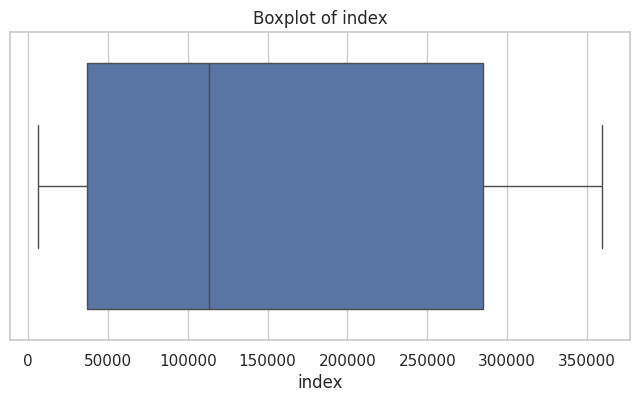

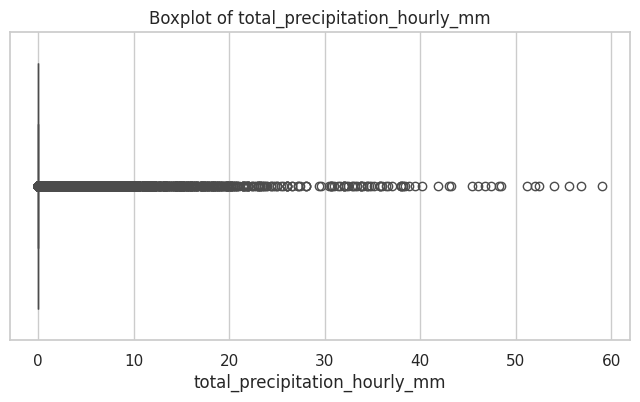

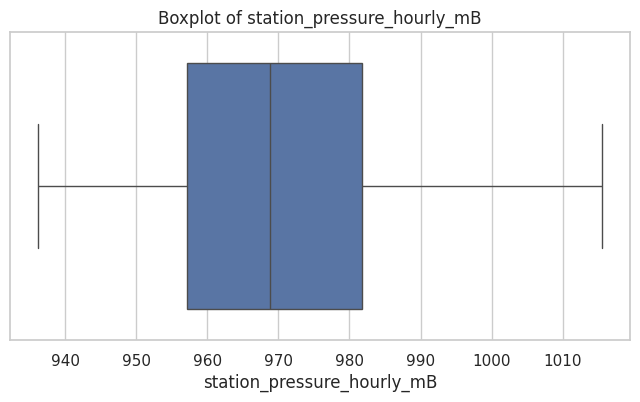

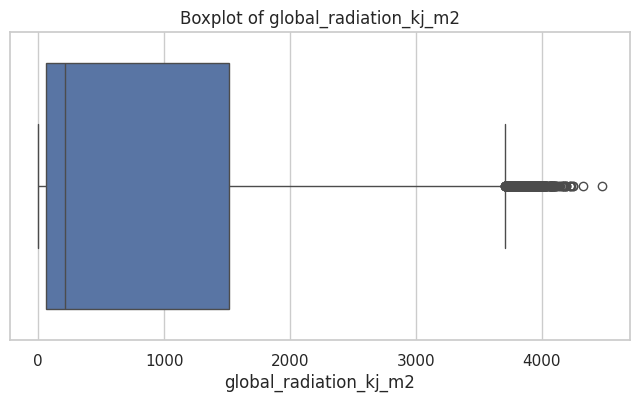

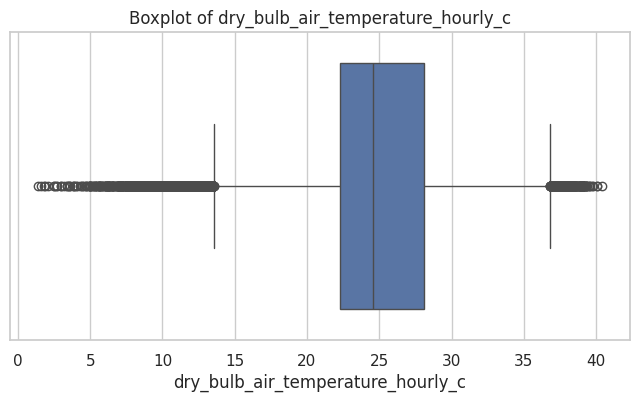

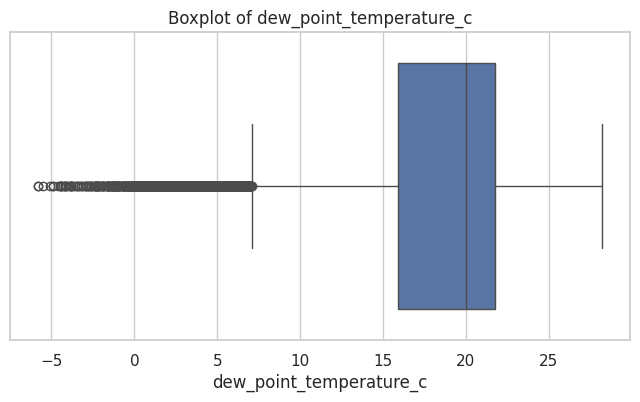

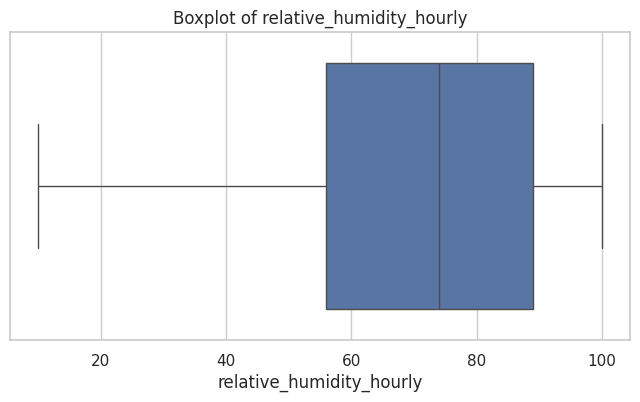

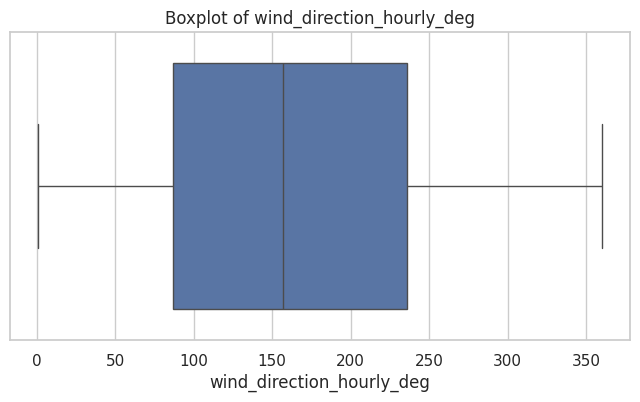

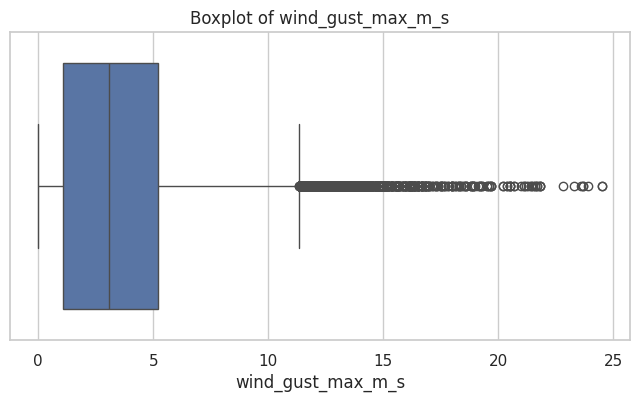

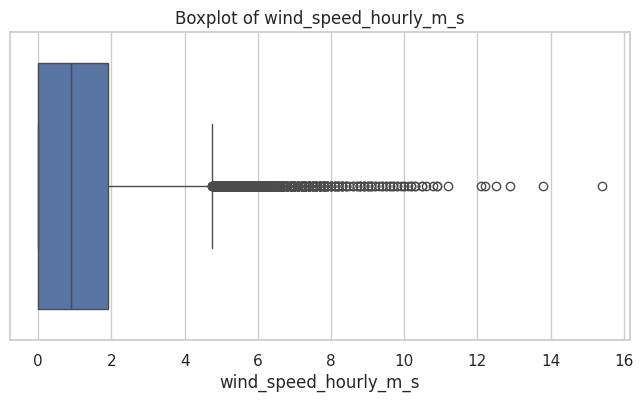

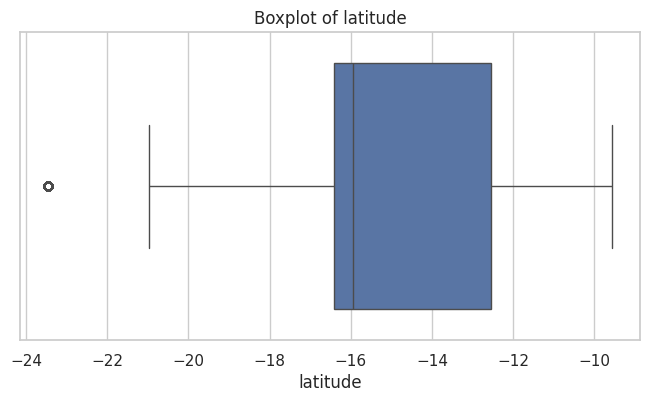

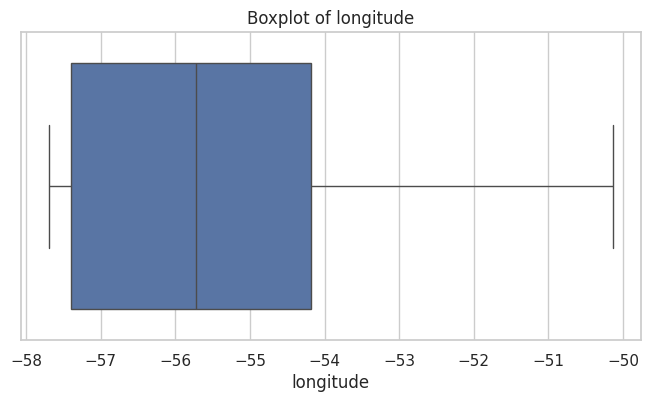

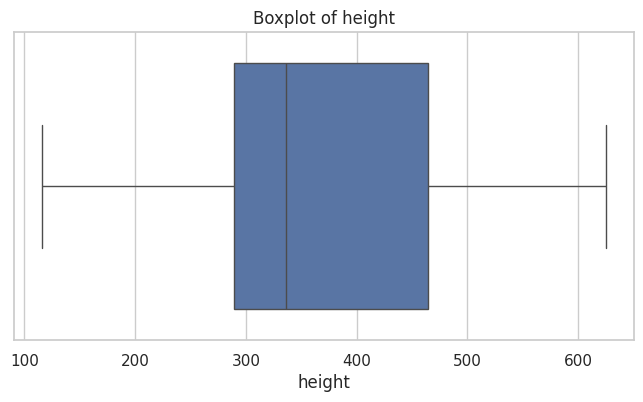

In [ ]:
# List of numerical columns in air_quality dataset
numerical_columns = temp_braz.select_dtypes(include=['float64', 'int64']).columns

# Initial Outlier Visualization
print("Initial Outlier Visualization:")
plot_boxplots(temp_braz, numerical_columns)

### Outlier Handling Strategy for Temperature Data

In our dataset, which includes variables like temperature, wind speed, humidity, and other environmental parameters, we’re dealing with raw representations of natural behavior. Unlike air_quality dataset, where outliers might result from noise or human-related activities, the outliers in this dataset reflect genuine natural variations. These fluctuations are not just random deviations; they are crucial indicators of the underlying natural processes and events, such as seasonal changes or atmospheric shifts.

In the air quality dataset, we opted for capping as an outlier handling strategy. Capping was appropriate there because air quality readings can be influenced by temporary factors like pollution spikes or measurement noise, which could distort the analysis. By capping, we aimed to mitigate the impact of extreme values that could result from these anomalies.

However, for this dataset, applying capping would risk oversimplifying the data and ignoring the inherent variability of natural systems. Since environmental data naturally contains extreme values that signify true occurrences rather than errors or noise, retaining these outliers allows us to capture the full spectrum of natural behavior. This choice is particularly critical for modeling purposes, as it enables our models to learn from both typical and extreme conditions, providing a more accurate representation of the dynamics in natural phenomena.

By preserving these outliers, we align with the dataset’s purpose: to understand and forecast natural patterns. This approach ensures that our model remains sensitive to genuine variations, supporting the accuracy and relevance of our insights and predictions in the context of environmental forecasting.

In [ ]:
columns = ['wind_speed_hourly_m_s','wind_gust_max_m_s','dew_point_temperature_c', 'dry_bulb_air_temperature_hourly_c','global_radiation_kj_m2','total_precipitation_hourly_mm','station_pressure_hourly_mB']
temp_braz = handle_outliers(temp_braz, columns, method ='robust_scale')

Initial Outlier Visualization:


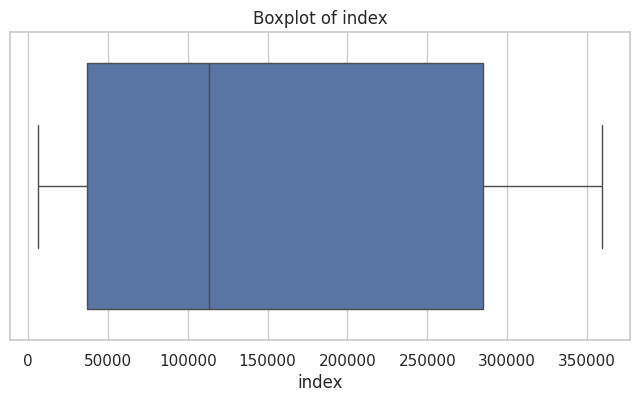

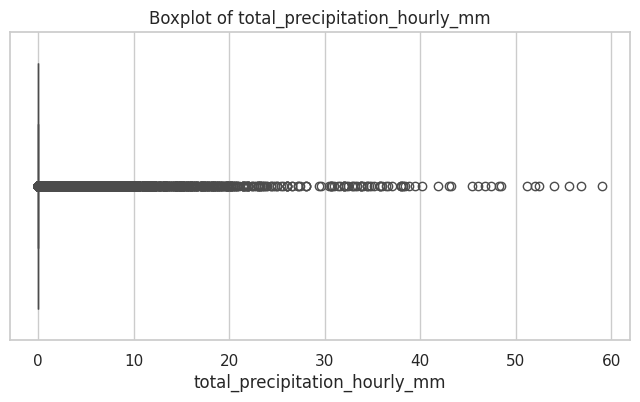

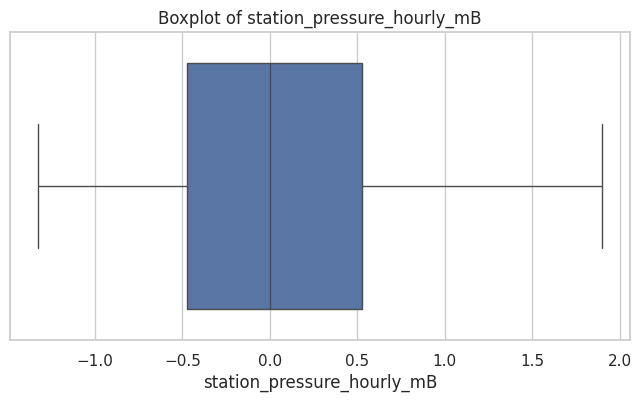

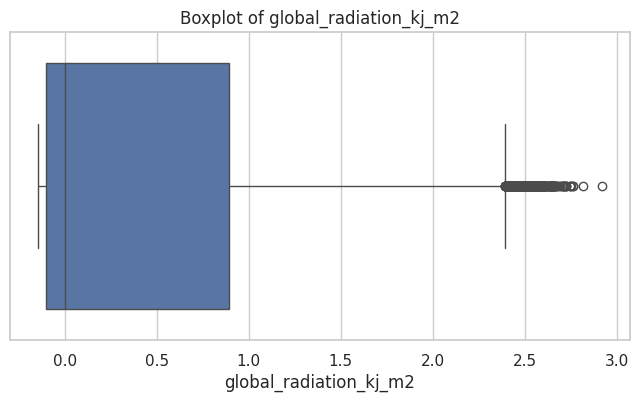

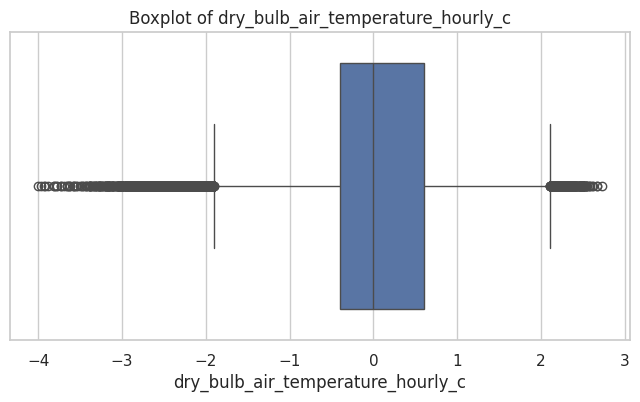

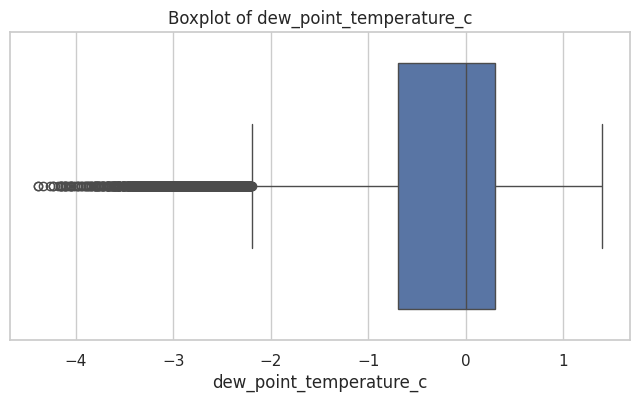

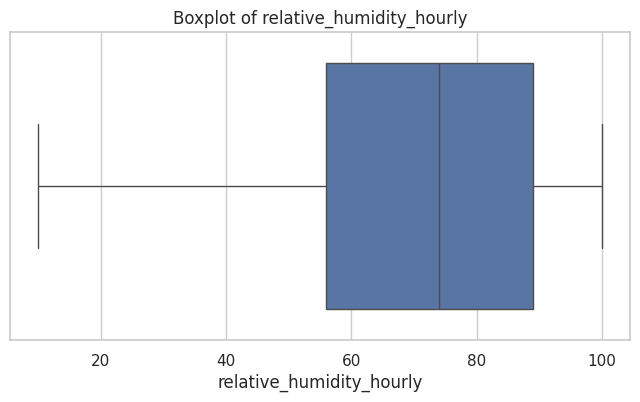

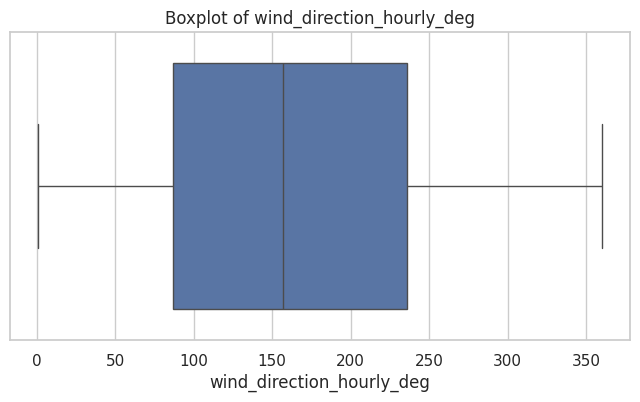

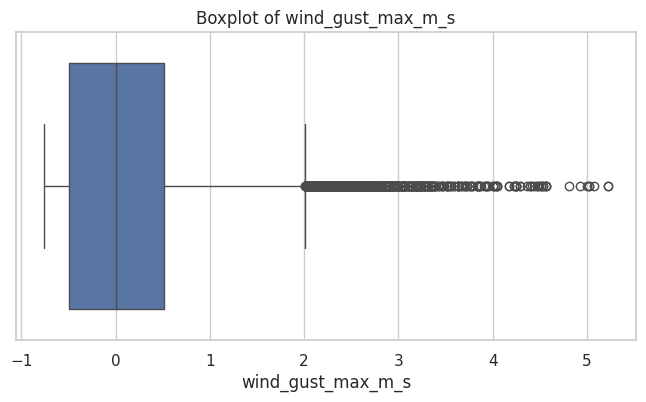

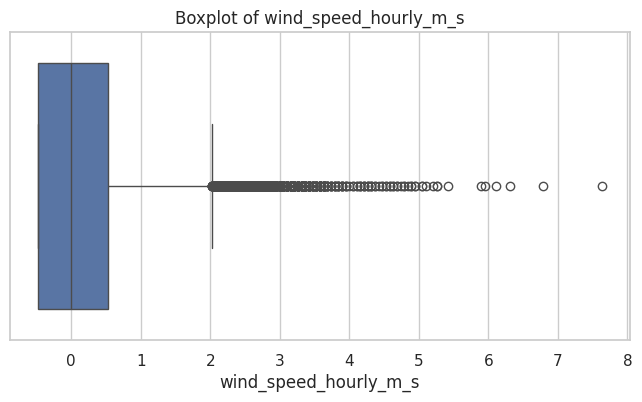

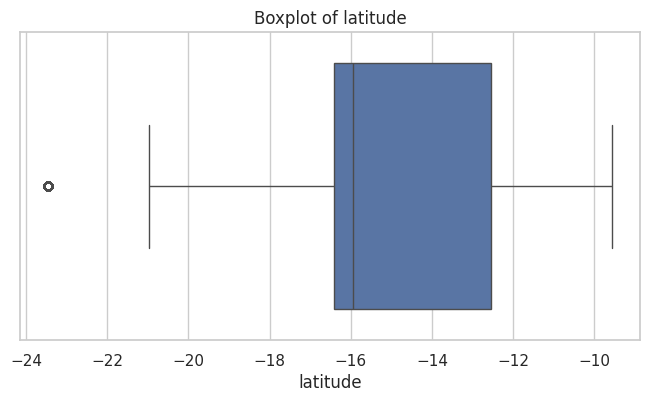

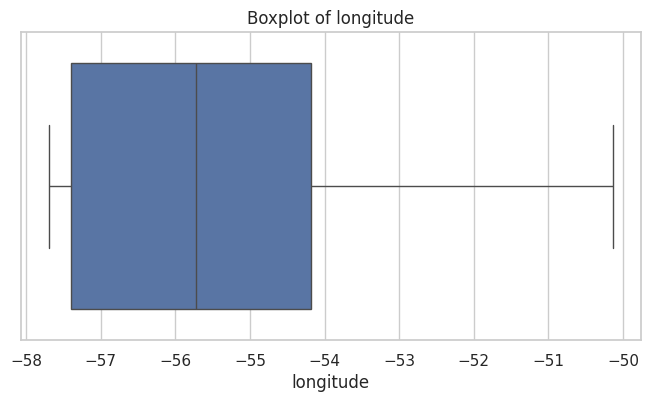

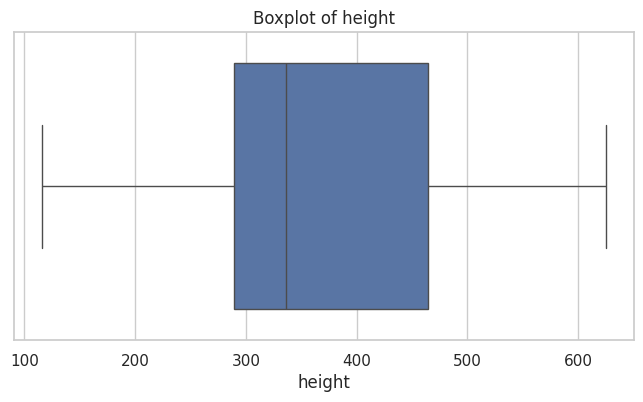

In [ ]:
# List of numerical columns in air_quality dataset
numerical_columns = temp_braz.select_dtypes(include=['float64', 'int64']).columns

# Initial Outlier Visualization
print("Initial Outlier Visualization:")
plot_boxplots(temp_braz, numerical_columns)

After running the robust scaling technique we can see that the influence of outliers is reduced through scaling based on the median and the IQR range. Thus we minimized the outliers' potential effect on our models' sensitivity.

## 2.5 Date-Time Feature Extraction

In [ ]:
temp_braz = standardize_date_index_MonthHour(temp_braz, 'datetime')

In [ ]:
columns_to_drop = ['month', 'index']
drop_columns(temp_braz, columns_to_drop)

Dropped columns: ['month', 'index']


In [ ]:
check(temp_braz,10)

,total_precipitation_hourly_mm,station_pressure_hourly_mB,global_radiation_kj_m2,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,relative_humidity_hourly,wind_direction_hourly_deg,wind_gust_max_m_s,wind_speed_hourly_m_s,station_code,latitude,longitude,height,season,time_of_day
datetime,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,-0.439024,-0.09392,-0.517241,0.101992,94.0,329.0,0.390244,0.157895,A754,-20.981667,-54.971944,464.0,1,5
2017-01-01 01:00:00,0.0,-0.426829,-0.09392,-0.500000,0.067995,93.0,327.0,0.000000,0.263158,A754,-20.981667,-54.971944,464.0,1,5
2017-01-01 02:00:00,0.0,-0.406504,-0.09392,-0.534483,0.016999,92.0,336.0,-0.097561,-0.210526,A754,-20.981667,-54.971944,464.0,1,5
2017-01-01 03:00:00,0.0,-0.406504,-0.09392,-0.431034,-0.067995,86.0,2.0,-0.243902,0.052632,A754,-20.981667,-54.971944,464.0,1,5
2017-01-01 04:00:00,0.0,-0.422764,-0.09392,-0.465517,-0.186985,83.0,318.0,0.048780,0.210526,A754,-20.981667,-54.971944,464.0,1,5
2017-01-01 05:00:00,0.0,-0.447154,-0.09392,-0.568966,-0.033997,91.0,310.0,-0.024390,0.157895,A754,-20.981667,-54.971944,464.0,1,1
2017-01-01 06:00:00,0.0,-0.459350,-0.09392,-0.586207,-0.050996,91.0,327.0,0.024390,0.105263,A754,-20.981667,-54.971944,464.0,1,1
2017-01-01 07:00:00,0.0,-0.467480,-0.09392,-0.586207,-0.067995,91.0,339.0,-0.121951,-0.157895,A754,-20.981667,-54.971944,464.0,1,1
2017-01-01 08:00:00,0.0,-0.443089,-0.09392,-0.534483,-0.050996,90.0,259.0,-0.365854,-0.210526,A754,-20.981667,-54.971944,464.0,1,1


## 2.6 Collinearity & Correlation Analysis:

### 2.6.1 Colinearity Treatment

In [ ]:
valuable_columns = temp_braz.select_dtypes(include=['float64', 'int64']).columns

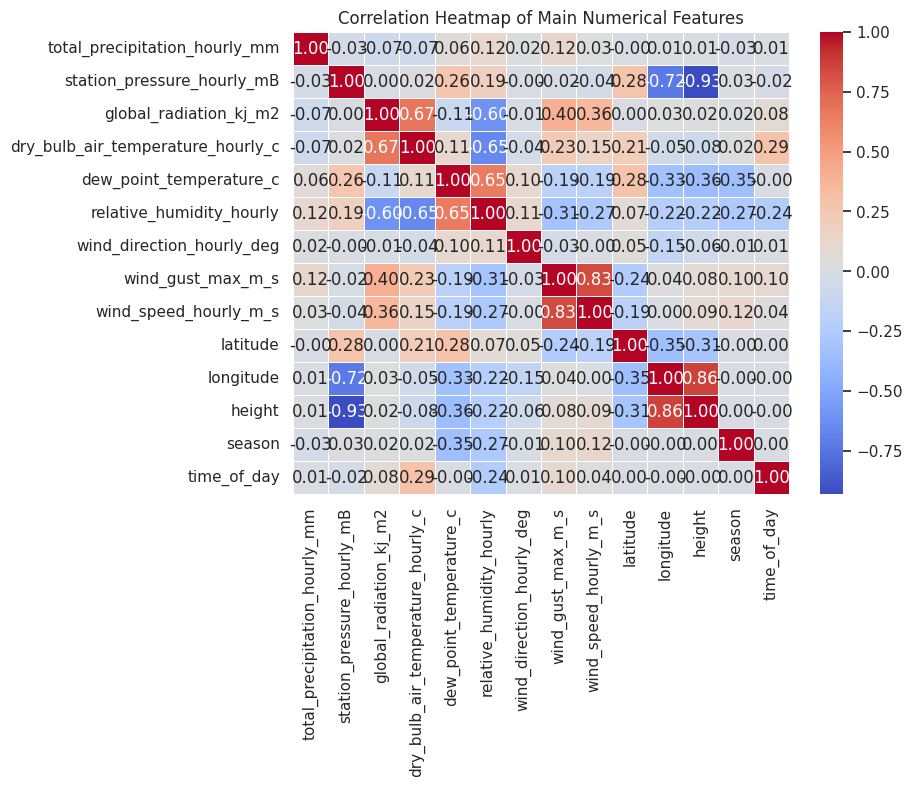

Highly Correlated Pairs: [('station_pressure_hourly_mB', 'height'), ('wind_gust_max_m_s', 'wind_speed_hourly_m_s'), ('wind_speed_hourly_m_s', 'wind_gust_max_m_s'), ('longitude', 'height'), ('height', 'station_pressure_hourly_mB'), ('height', 'longitude')]


In [ ]:
# Calculate correlation matrix for selected numerical features
correlation_matrix = temp_braz[valuable_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Main Numerical Features")
plt.show()

# Identify highly correlated features (absolute correlation > 0.8) among main numerical columns
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]
print("Highly Correlated Pairs:", high_corr_pairs)

**station_pressure_hourly_mB and height:**
These variables show a high correlation of approximately -0.93. Since height is a constant attribute for each station and does not vary over time, it adds redundancy when paired with station_pressure_hourly_mB. Retaining only station_pressure_hourly_mB, which varies based on atmospheric conditions, is preferable to avoid unnecessary complexity in the model.

**wind_gust_max_m_s and wind_speed_hourly_m_s:**
These two wind-related features are strongly correlated (0.83). Given that wind_gust_max_m_s is more correlated with the target variable, dry_bulb_air_temperature_hourly_c, it provides additional value in capturing fluctuations that might impact temperature. Therefore, wind_gust_max_m_s will be retained over wind_speed_hourly_m_s.

In [ ]:
collinear_pairs = [
    ('height', 'station_pressure_hourly_mB'),  # Drop 'height' and keep 'station_pressure_hourly_mB'
    ('wind_speed_hourly_m_s', 'wind_gust_max_m_s')  # Drop 'wind_speed_hourly_m_s' and keep 'wind_gust_max_m_s'
]

In [ ]:
temp_braz = drop_collinear_features(temp_braz, collinear_pairs)

Dropping collinear features: ['height', 'wind_speed_hourly_m_s']


## Categorical Feature transformation  

In [ ]:
unique_station_codes = temp_braz['station_code'].unique()
print(bold_start,bullet_start, "Unique station codes:", style_end, unique_station_codes)

 •  Unique station codes:  ['A754' 'A752' 'A910' 'A904' 'A902' 'A028' 'A941' 'A014' 'A924']


In [ ]:
temp_braz['station_code'] = temp_braz['station_code'].str.replace('A', '').astype(int)

In [ ]:
check(temp_braz, 10)

,total_precipitation_hourly_mm,station_pressure_hourly_mB,global_radiation_kj_m2,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,relative_humidity_hourly,wind_direction_hourly_deg,wind_gust_max_m_s,station_code,latitude,longitude,season,time_of_day
datetime,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,-0.439024,-0.09392,-0.517241,0.101992,94.0,329.0,0.390244,754,-20.981667,-54.971944,1,5
2017-01-01 01:00:00,0.0,-0.426829,-0.09392,-0.500000,0.067995,93.0,327.0,0.000000,754,-20.981667,-54.971944,1,5
2017-01-01 02:00:00,0.0,-0.406504,-0.09392,-0.534483,0.016999,92.0,336.0,-0.097561,754,-20.981667,-54.971944,1,5
2017-01-01 03:00:00,0.0,-0.406504,-0.09392,-0.431034,-0.067995,86.0,2.0,-0.243902,754,-20.981667,-54.971944,1,5
2017-01-01 04:00:00,0.0,-0.422764,-0.09392,-0.465517,-0.186985,83.0,318.0,0.048780,754,-20.981667,-54.971944,1,5
2017-01-01 05:00:00,0.0,-0.447154,-0.09392,-0.568966,-0.033997,91.0,310.0,-0.024390,754,-20.981667,-54.971944,1,1
2017-01-01 06:00:00,0.0,-0.459350,-0.09392,-0.586207,-0.050996,91.0,327.0,0.024390,754,-20.981667,-54.971944,1,1
2017-01-01 07:00:00,0.0,-0.467480,-0.09392,-0.586207,-0.067995,91.0,339.0,-0.121951,754,-20.981667,-54.971944,1,1
2017-01-01 08:00:00,0.0,-0.443089,-0.09392,-0.534483,-0.050996,90.0,259.0,-0.365854,754,-20.981667,-54.971944,1,1


### 2.6.2 Weak Y  Correlation  Treatment

Drops features from the dataset that have a correlation below the threshold with the target variable.


In [ ]:
temp_braz = drop_weakly_correlated_features(temp_braz, 'dry_bulb_air_temperature_hourly_c', threshold=0.1)


Dropping weakly correlated features: ['total_precipitation_hourly_mm', 'station_pressure_hourly_mB', 'wind_direction_hourly_deg', 'station_code', 'longitude', 'season']


## 2.7 Feature Engineering

### 2.7.1 Interaction Feature Creation:

#### 2.7.1.1 Initial Interaction Features List:

In [ ]:

# Humidity and dew point interaction
temp_braz['humidity_dew_interaction'] = temp_braz['dew_point_temperature_c'] * temp_braz['relative_humidity_hourly']

# Latitude and radiation interaction
temp_braz['latitude_radiation_interaction'] = temp_braz['latitude'] * temp_braz['global_radiation_kj_m2']

#### 2.7.1.2 Interaction Features Correlation Evaluation:

In [ ]:
# Calculate correlation of interaction features with the target variable
interaction_features = [
    'humidity_dew_interaction',
    'latitude_radiation_interaction',
]

correlations_with_target = temp_braz[interaction_features + ['dry_bulb_air_temperature_hourly_c']].corr()['dry_bulb_air_temperature_hourly_c'].drop('dry_bulb_air_temperature_hourly_c')
print("Correlations of Interaction Features with Target Variable:")
print(correlations_with_target)

Correlations of Interaction Features with Target Variable:
humidity_dew_interaction          0.370185
latitude_radiation_interaction   -0.609281
Name: dry_bulb_air_temperature_hourly_c, dtype: float64


#### 2.7.1.3 Relevant Interaction Features Selection

In [ ]:
# Define a threshold for selecting interaction features
correlation_threshold = 0.2

# Filter interaction features based on the correlation threshold
selected_interactions = correlations_with_target[correlations_with_target.abs() > correlation_threshold].index.tolist()

# Keep only the selected interaction features in the dataset
temp_braz = temp_braz[selected_interactions + ['dry_bulb_air_temperature_hourly_c'] + temp_braz.columns.difference(interaction_features + ['dry_bulb_air_temperature_hourly_c']).tolist()]

In [ ]:
check(temp_braz, 10)

,humidity_dew_interaction,latitude_radiation_interaction,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,global_radiation_kj_m2,latitude,relative_humidity_hourly,time_of_day,wind_gust_max_m_s
datetime,,,,,,,,,
2017-01-01 00:00:00,9.587234,1.970589,-0.517241,0.101992,-0.09392,-20.981667,94.0,5,0.390244
2017-01-01 01:00:00,6.323495,1.970589,-0.500000,0.067995,-0.09392,-20.981667,93.0,5,0.000000
2017-01-01 02:00:00,1.563875,1.970589,-0.534483,0.016999,-0.09392,-20.981667,92.0,5,-0.097561
2017-01-01 03:00:00,-5.847533,1.970589,-0.431034,-0.067995,-0.09392,-20.981667,86.0,5,-0.243902
2017-01-01 04:00:00,-15.519759,1.970589,-0.465517,-0.186985,-0.09392,-20.981667,83.0,5,0.048780
2017-01-01 05:00:00,-3.093753,1.970589,-0.568966,-0.033997,-0.09392,-20.981667,91.0,1,-0.024390
2017-01-01 06:00:00,-4.640629,1.970589,-0.586207,-0.050996,-0.09392,-20.981667,91.0,1,0.024390
2017-01-01 07:00:00,-6.187505,1.970589,-0.586207,-0.067995,-0.09392,-20.981667,91.0,1,-0.121951
2017-01-01 08:00:00,-4.589633,1.970589,-0.534483,-0.050996,-0.09392,-20.981667,90.0,1,-0.365854


In [ ]:
size(temp_braz)

(157680, 9)

### 2.7.2 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to scale (excluding one-hot encoded dummies)
numerical_columns = ['humidity_dew_interaction','latitude_radiation_interaction','dry_bulb_air_temperature_hourly_c','dew_point_temperature_c','global_radiation_kj_m2','latitude','relative_humidity_hourly','wind_gust_max_m_s']
scaler = StandardScaler()
temp_braz.loc[:, numerical_columns] = scaler.fit_transform(temp_braz[numerical_columns])

print("Scaled numerical features")
print(temp_braz[numerical_columns].head())

Scaled numerical features
                     humidity_dew_interaction  latitude_radiation_interaction  \
datetime                                                                        
2017-01-01 00:00:00                  0.403005                        0.730346   
2017-01-01 01:00:00                  0.329712                        0.730346   
2017-01-01 02:00:00                  0.222827                        0.730346   
2017-01-01 03:00:00                  0.056391                        0.730346   
2017-01-01 04:00:00                 -0.160814                        0.730346   

                     dry_bulb_air_temperature_hourly_c  \
datetime                                                 
2017-01-01 00:00:00                          -0.750960   
2017-01-01 01:00:00                          -0.729502   
2017-01-01 02:00:00                          -0.772419   
2017-01-01 03:00:00                          -0.643667   
2017-01-01 04:00:00                          -0.686584   


**Rationale for Downsampling 2017 Data**

Downsampling the 2017 data allows us to maintain the original patterns and trends within the dataset without introducing synthetic replication, which could distort the analysis. This approach leverages two years of data, capturing seasonal and temporal trends essential for accurate forecasting in environmental time-series. By reducing the granularity of 2017 to a consistent hourly or daily basis, we ensure comparability with 2018 while avoiding redundancy and computational strain. This balance retains the valuable insights from both years, maximizing informational richness and reducing the risk of overfitting that could arise from excessive data points. Furthermore, downsampling aligns with the dataset's time-series structure, keeping data integrity while supporting efficient processing and reliable model training.

# 3. Final Data Inspection & Validation


In this final validation step, we ensure that our dataset is completely clean and consistent, ready for modeling:

1. **Data Types**: We check that each column is assigned the correct data type, which ensures that numerical and categorical data are appropriately handled by the model.
2. **Missing Values**: Any missing data at this stage would disrupt model performance. We've previously filled missing values, but this final check ensures no NaNs remain.
3. **Datetime Index Consistency**: Our dataset relies on a continuous hourly time series. By verifying the datetime index, we confirm that there are no unexpected gaps in our data, maintaining the integrity of time-dependent features.
4. **Unique Values in Categorical Columns**: Checking unique values in categorical columns, like `station_code`, helps us verify that encoding or data cleaning steps did not introduce unexpected categories.
5. **Statistical Summary**: Reviewing the summary statistics helps us spot any remaining inconsistencies or potential outliers in the data, ensuring that values fall within expected ranges.
6. **Final Shape and Columns**: We check the final dataset shape and column names to confirm we have the correct number of rows and columns with no unintended changes.

This thorough validation provides confidence that the data is fully prepared and free from structural or type-based inconsistencies.


In [ ]:
#  we check data types and if they match the expected types
print(bold_start,bullet_start,"Data Types:\n", style_end, temp_braz.dtypes)

 •  Data Types:
  humidity_dew_interaction             float64
latitude_radiation_interaction       float64
dry_bulb_air_temperature_hourly_c    float64
dew_point_temperature_c              float64
global_radiation_kj_m2               float64
latitude                             float64
relative_humidity_hourly             float64
time_of_day                            int64
wind_gust_max_m_s                    float64
dtype: object


In [ ]:
# we summarize missing values across columns
missing_values_summary = temp_braz.isnull().sum()
print(bold_start,bullet_start, "Missing Values:\n", style_end,missing_values_summary[missing_values_summary > 0])

 •  Missing Values:
  Series([], dtype: int64)


In [ ]:
# Verify if the datetime index is continuous and covers the entire expected range
expected_time_range = pd.date_range(start=temp_braz.index.min(), end=temp_braz.index.max(), freq='H')
missing_times = expected_time_range.difference(temp_braz.index)
print(bold_start,bullet_start,"Missing Timestamps:\n", style_end, missing_times)

 •  Missing Timestamps:
  DatetimeIndex([], dtype='datetime64[ns]', freq='h')


<ipython-input-46-08f753801e75>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_time_range = pd.date_range(start=temp_braz.index.min(), end=temp_braz.index.max(), freq='H')


In [ ]:
# Statistical summary for numerical columns
print(bold_start,bullet_start,"Statistical Summary:\n", style_end, temp_braz.describe())


 •  Statistical Summary:
         humidity_dew_interaction  latitude_radiation_interaction  \
count              1.576800e+05                    1.576800e+05   
mean               3.028188e-17                    8.291468e-17   
std                1.000003e+00                    1.000003e+00   
min               -6.848390e+00                   -4.816576e+00   
25%               -6.464593e-01                   -4.979708e-01   
50%                1.877075e-01                    5.615411e-01   
75%                7.144987e-01                    6.869726e-01   
max                3.255312e+00                    8.533654e-01   

       dry_bulb_air_temperature_hourly_c  dew_point_temperature_c  \
count                       1.576800e+05             1.576800e+05   
mean                        1.081496e-18             5.623778e-17   
std                         1.000003e+00             1.000003e+00   
min                        -5.085622e+00            -5.180958e+00   
25%                     

In [ ]:
# Display the final shape and columns
print(bold_start,bullet_start,"Final Dataset Shape:", style_end, temp_braz.shape)
print(bold_start,bullet_start,"Final Column Names:\n", style_end, temp_braz.columns)


 •  Final Dataset Shape:  (157680, 9)
 •  Final Column Names:
  Index(['humidity_dew_interaction', 'latitude_radiation_interaction',
       'dry_bulb_air_temperature_hourly_c', 'dew_point_temperature_c',
       'global_radiation_kj_m2', 'latitude', 'relative_humidity_hourly',
       'time_of_day', 'wind_gust_max_m_s'],
      dtype='object')


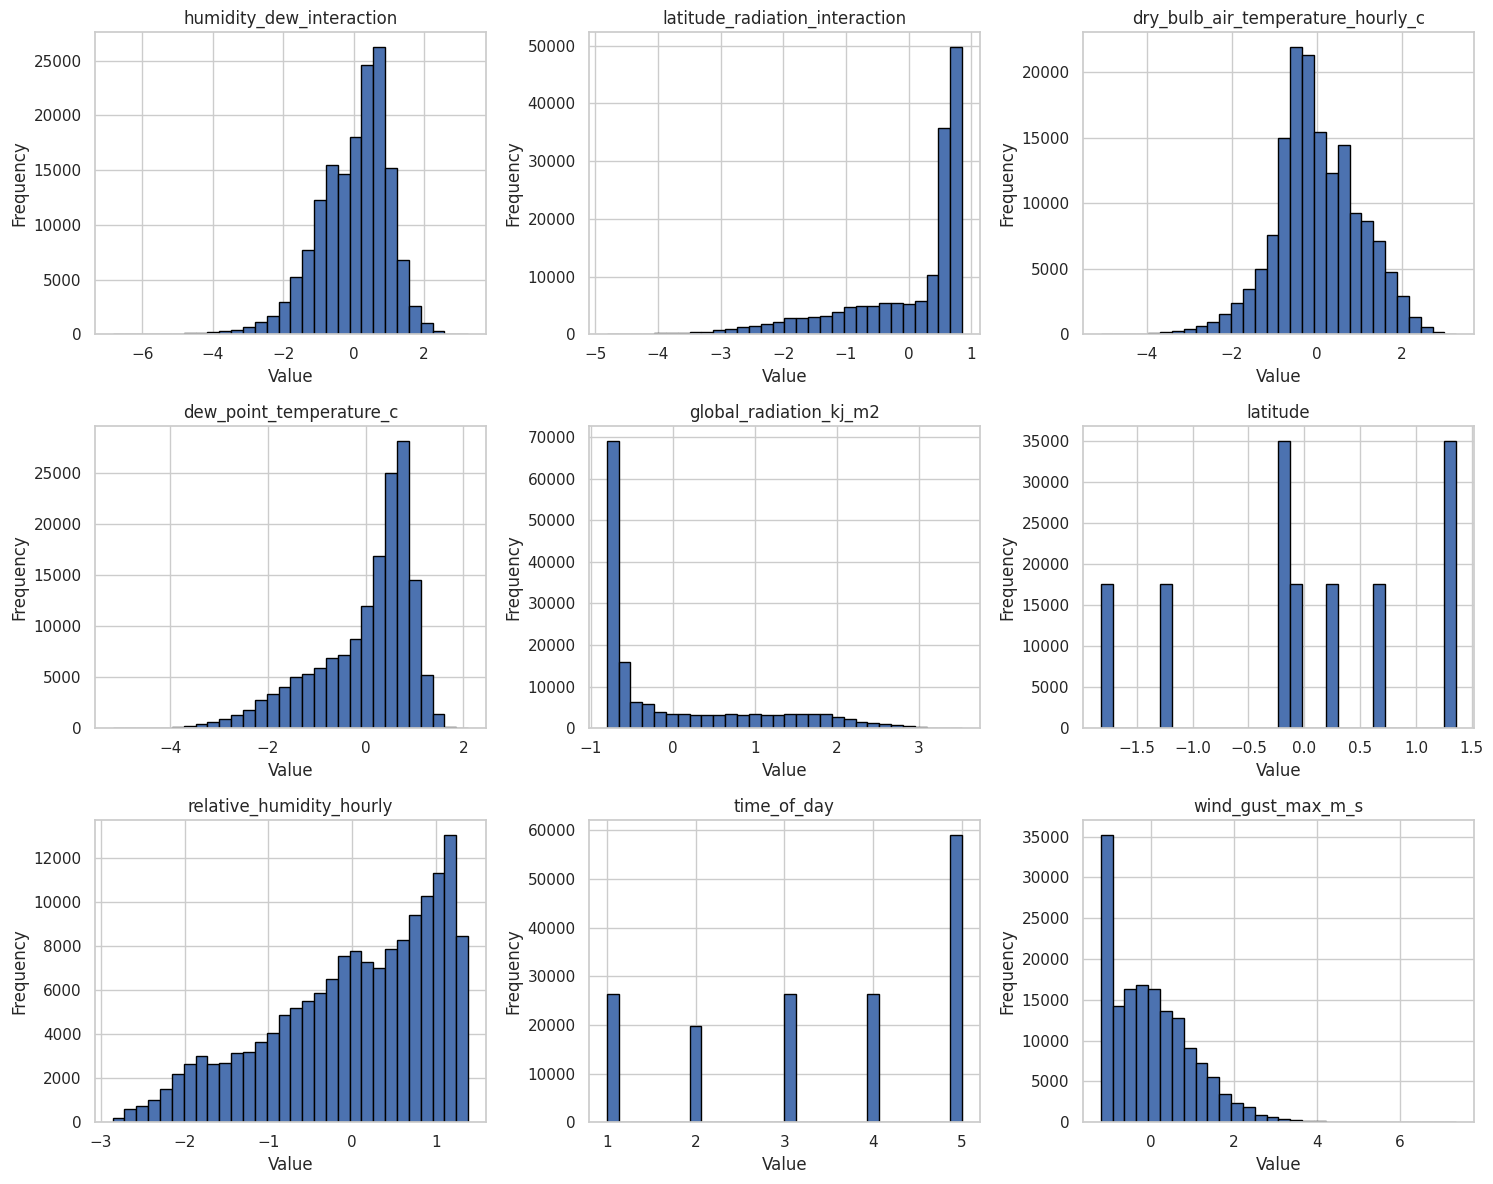

In [ ]:
plot_numeric_histograms(temp_braz)

In [ ]:
missing_summ(temp_braz)

Series([], dtype: int64)


,0


In [ ]:
check(temp_braz,10)

,humidity_dew_interaction,latitude_radiation_interaction,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,global_radiation_kj_m2,latitude,relative_humidity_hourly,time_of_day,wind_gust_max_m_s
datetime,,,,,,,,,
2017-01-01 00:00:00,0.403005,0.730346,-0.750960,0.472318,-0.731099,-1.257296,1.104941,5,0.439355
2017-01-01 01:00:00,0.329712,0.730346,-0.729502,0.429490,-0.731099,-1.257296,1.057752,5,-0.119365
2017-01-01 02:00:00,0.222827,0.730346,-0.772419,0.365248,-0.731099,-1.257296,1.010562,5,-0.259045
2017-01-01 03:00:00,0.056391,0.730346,-0.643667,0.258179,-0.731099,-1.257296,0.727425,5,-0.468564
2017-01-01 04:00:00,-0.160814,0.730346,-0.686584,0.108281,-0.731099,-1.257296,0.585856,5,-0.049525
2017-01-01 05:00:00,0.118232,0.730346,-0.815337,0.301007,-0.731099,-1.257296,0.963372,1,-0.154285
2017-01-01 06:00:00,0.083495,0.730346,-0.836795,0.279593,-0.731099,-1.257296,0.963372,1,-0.084445
2017-01-01 07:00:00,0.048757,0.730346,-0.836795,0.258179,-0.731099,-1.257296,0.963372,1,-0.293964
2017-01-01 08:00:00,0.084640,0.730346,-0.772419,0.279593,-0.731099,-1.257296,0.916183,1,-0.643164


# 4. Final Dataset Export

In [ ]:
# Saving the finalized dataset after EDA to a new CSV file for direct loading in the modeling stage.

temp_braz.to_csv("/content/drive/My Drive/Colab Notebooks/temp_braz_final.csv", index=True)
print("Finalized dataset saved as 'temp_braz_final.csv'")

Finalized dataset saved as 'temp_braz_final.csv'
